In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train = pd.read_csv('Train.csv')

In [16]:
train.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
5431,5432,F,Ship,4,4,261,3,high,M,9,5515,0
5059,5060,F,Road,4,3,143,3,low,F,2,4693,0
4537,4538,F,Flight,4,3,197,5,low,F,8,4209,1
10081,10082,F,Ship,3,2,215,2,low,F,7,4305,0
8714,8715,A,Ship,3,5,222,4,medium,F,9,4247,0


In [17]:
numericals = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']
categoricals = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

In [18]:
train.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<AxesSubplot:>

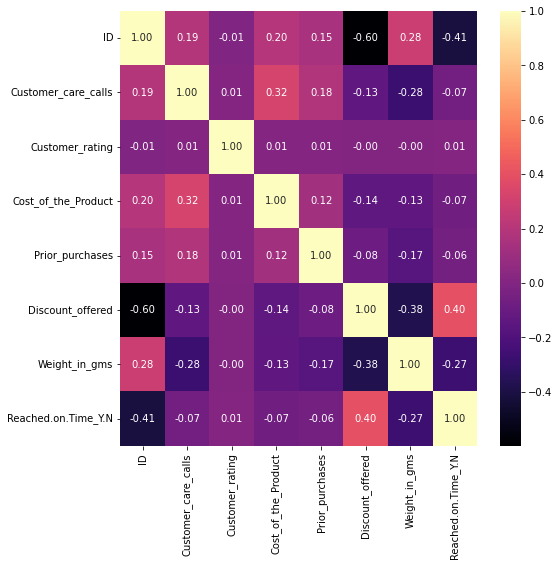

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.corr(), cmap='magma', annot=True, fmt='.2f')

Feature target yang digunakan adalah 'Reached.on.Time_Y.N'. Korelasi feature target dengan feature lain yang paling tinggi adalah 'Discount_offered' (korelasi positif) dan 'Weight_in_gms' (korelasi negatif). Hal ini menunjukkan bahwa feature 'Discount_offered' dan 'Weight_in_gms' dapat mempengaruhi ketepatan waktu pengiriman. </br>
Selain itu, terdapat korelasi positif antara 'Customer_care_calls' dan 'Cost_of_the_Product' sebesar 0.32, serta korelasi negatif antara 'Discount_offered' dan 'Weight_in_gms' sebesar -0.38

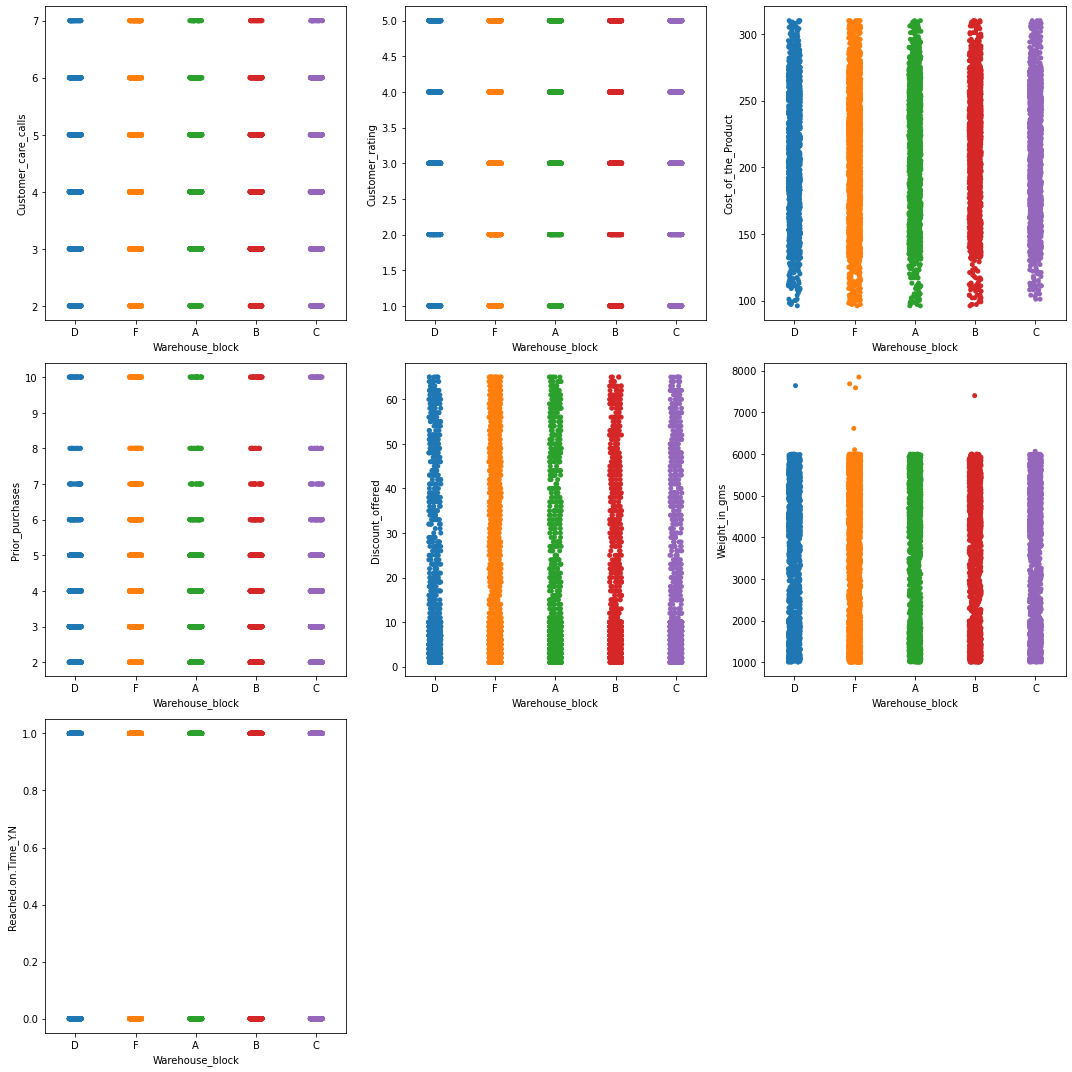

In [24]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)):
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=train, x='Warehouse_block', y=numericals[i])
    plt.tight_layout()

Antara feature categorical 'Warehouse_block' dengan feature numerical tidak terlalu berpengaruh satu sama lain karena persebarannya cukup merata. Hanya saja terdapat beberapa outlier pada korelasi dengan 'Weight_in_gms'

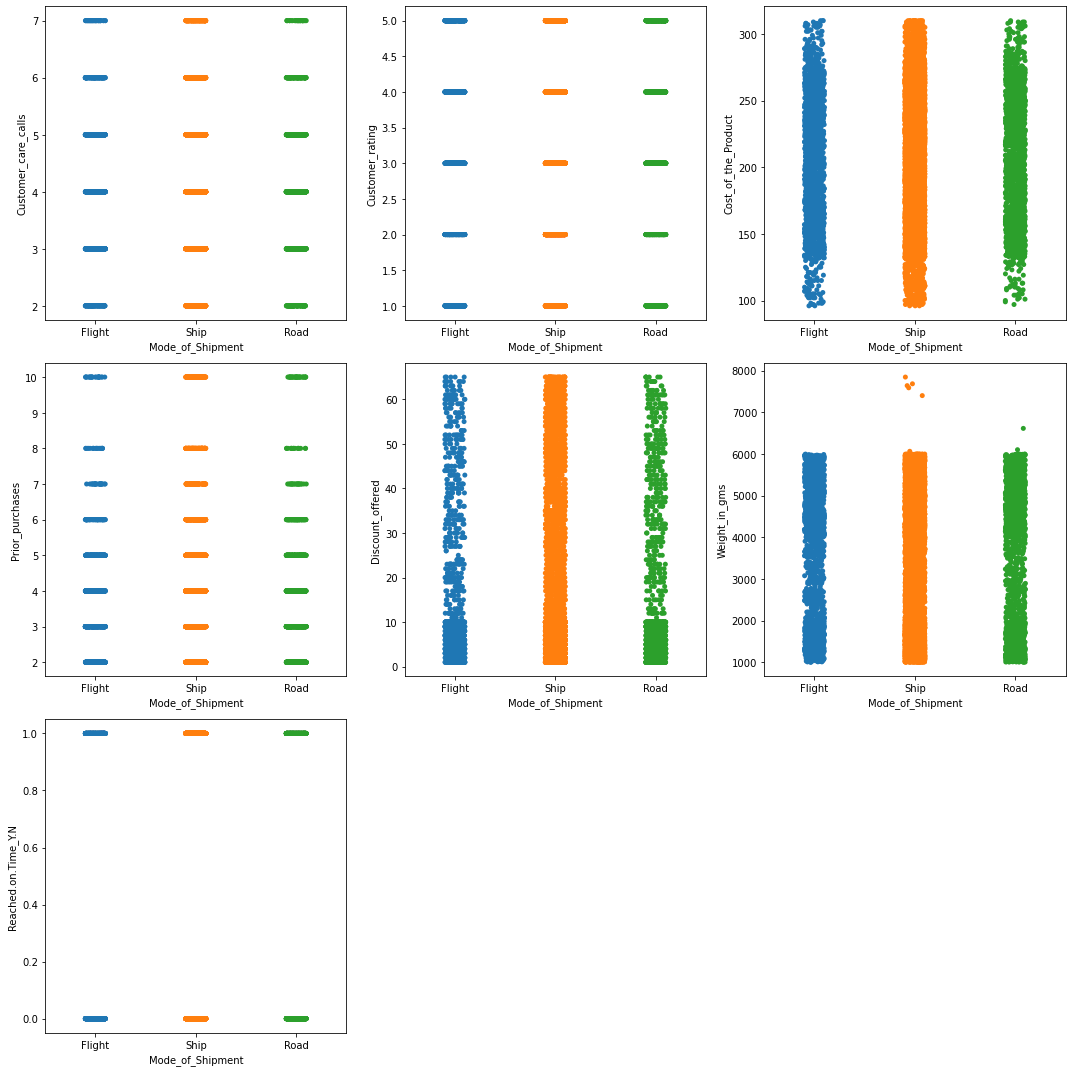

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=train, x='Mode_of_Shipment', y=numericals[i]) 
    plt.tight_layout()

Pada feature categorical 'Mode_of_Shipment' dapat dilihat di feature 'Cost_of_the_Product' dan 'Discount_offered' paling padat ada di 'Mode_of_Shipment' Ship.

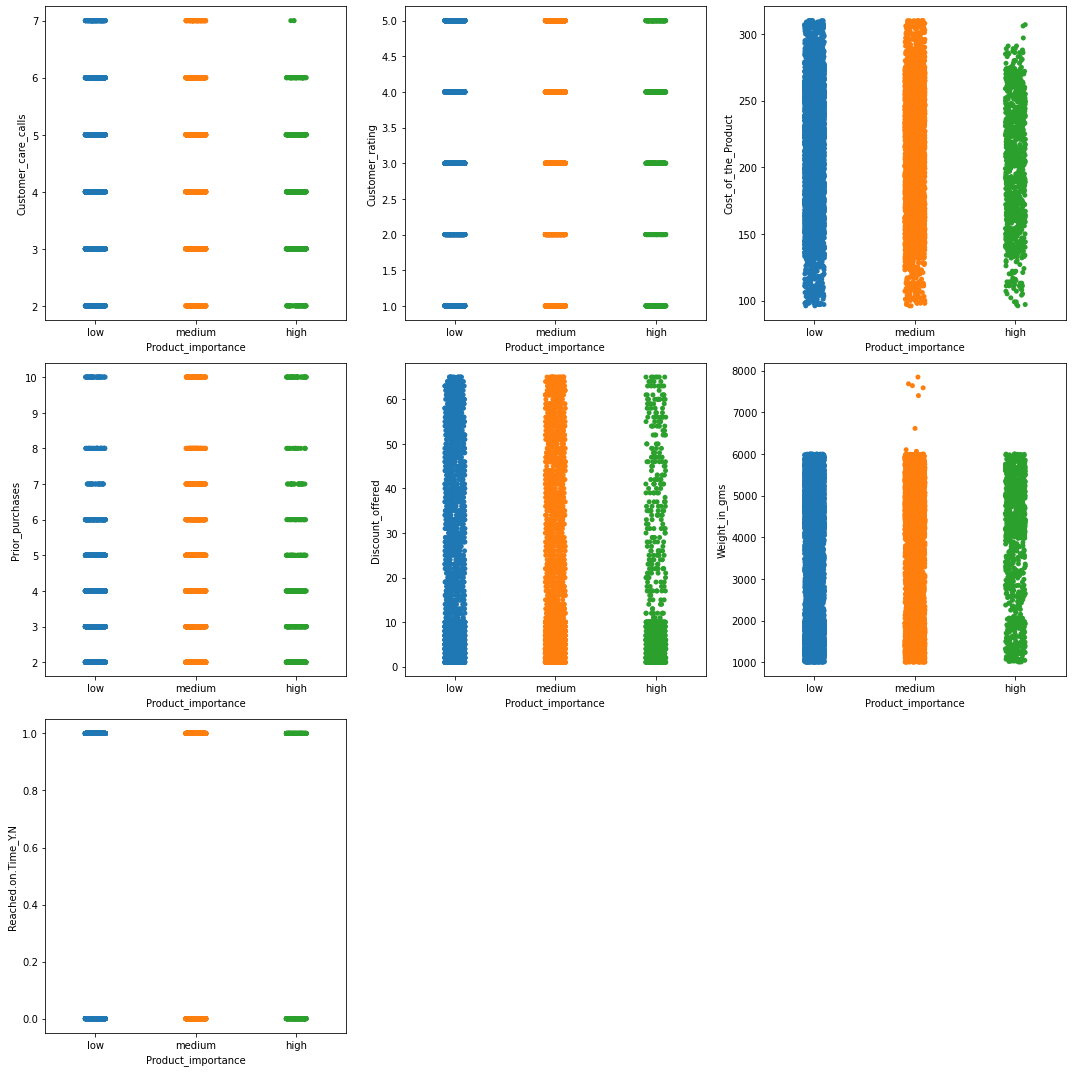

In [27]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=train, x='Product_importance', y=numericals[i]) 
    plt.tight_layout()

- Dapat dilihat di feature 'Discount_offered' untuk kategori High tidak sebanyak kategori Low dan Medium.
- Pada feature 'Cost_of_the_Product', kategori High lebih rendah dari kategori lain dan yang mencapai nilai 300 hanya beberapa.
- Terdapat beberapa outlier pada korelasi dengan 'Weight_in_gms'

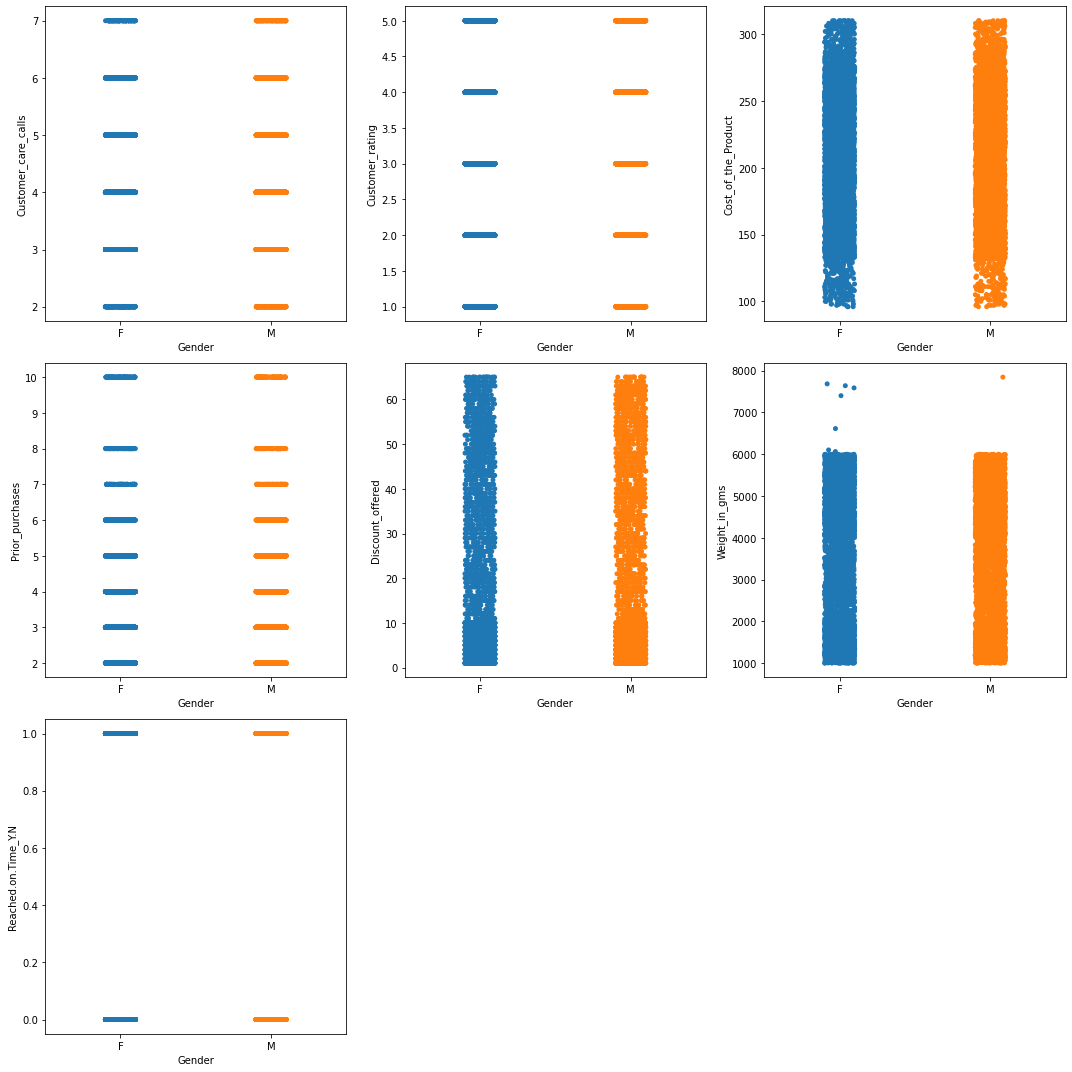

In [28]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=train, x='Gender', y=numericals[i]) 
    plt.tight_layout()

Antara feature categorical 'Gender' dengan feature numerical tidak terlalu berpengaruh satu sama lain karena persebarannya cukup merata. Hanya saja terdapat beberapa outlier pada korelasi dengan 'Weight_in_gms'.